In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('dataset/다중공선성고려완료_1234.pkl')

,성별,연령대,거주지역,membership_abs,객단가_Net,객단가_Abs,가공식품_app_r_Net,가공식품_app_r_Abs,가구/인테리어_app_r_Net,가구/인테리어_app_r_Abs,...,B_ratio_Abs,C_ratio_Net,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs,target
0,0,5,20,0.0,0,0,-2,12,1,11,...,1,0,6,0,0,-4,8,3,3,1
1,0,6,14,0.0,0,0,6,12,-2,8,...,5,3,3,5,5,-1,5,-5,9,0
2,0,7,1,0.0,-1,3,-7,7,-2,8,...,0,0,6,0,0,1,5,-2,6,1
3,0,3,7,0.0,2,4,-8,8,5,7,...,3,5,5,0,0,-4,6,-7,7,0
4,0,6,18,0.0,1,1,4,8,4,14,...,0,2,2,0,0,-3,3,-5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,0,1,1,0.0,-2,2,6,6,0,16,...,6,0,0,0,0,2,2,0,10,0
19081,0,1,1,1.0,-2,4,-6,18,4,20,...,6,0,6,0,0,2,2,-1,15,0
19082,1,5,30,0.0,-3,7,1,17,0,0,...,0,5,9,0,0,0,0,2,2,1
19083,0,1,33,0.0,0,2,-7,17,0,0,...,2,0,0,0,0,0,4,0,14,0


In [4]:
test_df = df.drop('target',axis=1)

In [6]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pca.fit_transform(test_df)
pca_df = pd.DataFrame(pca_df)

pca_df

,0,1
0,7.200031,0.225417
1,0.776069,-8.912499
2,-12.111147,-8.227110
3,-6.323122,-8.636258
4,5.121206,-0.128022
...,...,...
19080,-11.294450,13.719143
19081,-11.525560,1.784116
19082,16.624913,-13.293316
19083,20.005209,-2.294182


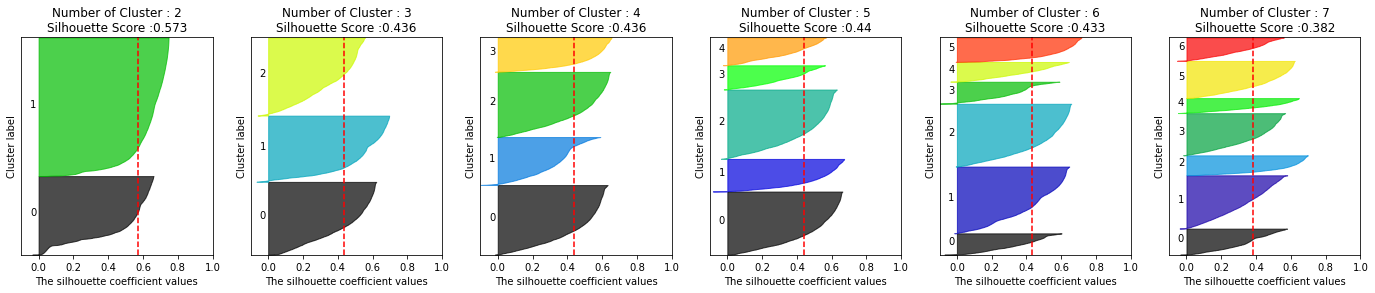

In [33]:
visualize_silhouette([2,3,4,5,6,7], pca_df)